In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load dataset
data = pd.read_csv("Retail_Sales_Dataset.csv")

In [3]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,region
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,East
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,East
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,East
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,West
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,East


In [25]:
# Step 3: Explore dataset
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe())


Dataset Shape: (1000, 10)

Columns: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'region'],
      dtype='object')

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
region              0
dtype: int64

Summary Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000     

In [4]:
# Step 5: Group sales data by Region
region_sales = data.groupby("region")["Total Amount"].sum().reset_index()
print("\nTotal Sales by Region:\n", region_sales)



Total Sales by Region:
     region  Total Amount
0  Central         81945
1     East         90685
2    North         90770
3    South         96185
4     West         96415


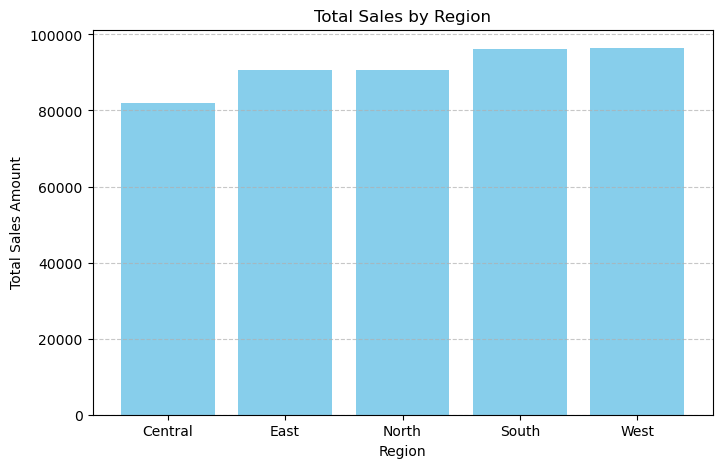

In [5]:
# Step 6: Visualize total sales by Region (Bar Plot)
plt.figure(figsize=(8,5))
plt.bar(region_sales["region"], region_sales["Total Amount"], color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


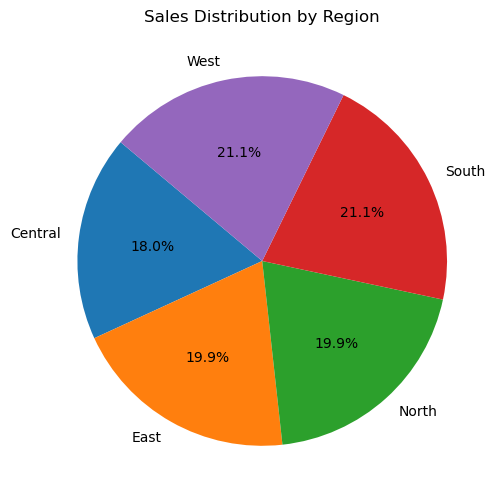

In [6]:

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(region_sales["Total Amount"], labels=region_sales["region"], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Region")
plt.show()


In [7]:
# Step 7: Identify Top Performing Regions
top_regions = region_sales.sort_values(by="Total Amount", ascending=False).head(3)
print("\nTop Performing Regions:\n", top_regions)


Top Performing Regions:
   region  Total Amount
4   West         96415
3  South         96185
2  North         90770


In [8]:
# Step 8: Group by Region and Product Category
region_category_sales = data.groupby(["region", "Product Category"])["Total Amount"].sum().unstack().fillna(0)
print("\nSales by Region and Product Category:\n", region_category_sales)



Sales by Region and Product Category:
 Product Category  Beauty  Clothing  Electronics
region                                         
Central            35030     19765        27150
East               29715     28495        32475
North              27260     32240        31270
South              29695     38280        28210
West               21815     36800        37800


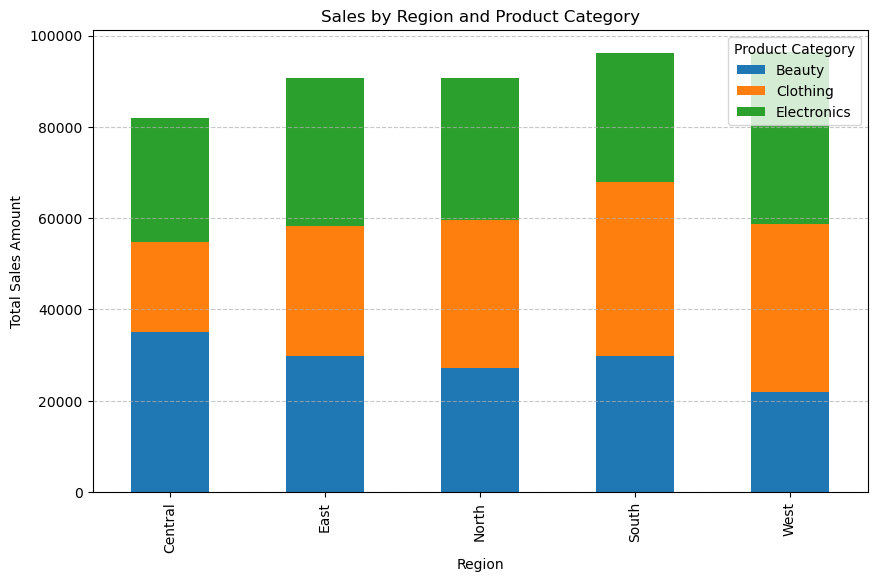

In [9]:
# Step 9: Create a Stacked Bar Plot (Region vs Product Category)
region_category_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
